# About the Notebook

In the previous notebook, we had cleaned the data and did initial data exploration to discover the nature of the data (as summarised below).

In this notebook, we will be focusing on preparing the data for visualisation to discover insights. The visualisations aims to provide insights about the malaria situation in ASEAN countries (with respect to the rest of the world, and within the ASEAN countries themselves).

About the datasets:
- There are three malaria datasets
    - Malaria Deaths per Age Group (age_grp_death_df)
    - Malaria Death Rate (death_rate_df)
    - Malaria Incidence Rate (inc_rate_df)
    
**Definitions**
|*Term*|*Definition*|
|---|---|
|Death rate|The number of deaths from malaria per 100,000 people.|
|Incidence rate|The number of new cases of malaria in a year per 1,000 population
at risk.|
|Deaths/ Total Deaths|Annual number of deaths from malaria.|

**Source**: [Our World in Data](https://ourworldindata.org/malaria#)

**SUMMARY OF THE THREE DATA SETS**
|DataSet|Description|Similarity with other datasets|
|---|---|---|
|age_grp_death_df|<li>228 Unique entities (200 countries, 22 regions, 6 income class)<li>Shows number of malaria deaths of 5 different age groups across the years 1990-2016|<li>Identical set of Entity as `death_rate_df`<li>Do not had income class entity that are found in `inc_rate_df`<li>Out of the 200 Countries found in this dataset, 100 are found in `inc_rate_df` as well.|
|death_rate_df|<li>228 Unique entities (200 countries, 22 regions, 6 income class)<li>Shows malaria deaths rates across the years 1990-2016|<li>Identical set of Entity as `age_grp_death_df`<li>Do not had income class entity that are found in `inc_rate_df`<li>Out of the 200 Countries found in this dataset, 100 are found in `inc_rate_df` as well.|
|inc_rate_df|<li>127 Unique entities (100 countries, 5 regions, 22 income class)<li>Shows malaria incidence rates in the years 2000, 2005, 2015 and 2015|<li>Countries found in this dataset are found in all other datasets<li>Have most of the unique income-class entity compared to the other datasets|

# PART 1. Imports

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd

#Visualisation:
import seaborn               as sns
import matplotlib.pyplot     as plt
sns.set_theme(style="whitegrid")

#Import Data_analysis functions
from data_analysis import *

#Country Data Processing
from geonamescache import GeonamesCache
# # import country_converter as coco
# import pycountry

In [2]:
#List of data set names
dataframe_ls = "age_grp_death_df,death_rate_df,inc_rate_df"
dataframe_ls = dataframe_ls.split(',')

for data in dataframe_ls:
    globals()[data] = pd.read_csv(f"../data_output/{data}.csv")
    print(f"Dataframe: {data}")
    globals()[data].head(3)

Dataframe: age_grp_death_df


,Entity,Code,Year,Age_group,Deaths,Entity_type,Updated_Entity
0,Afghanistan,AFG,1990,Under 5,184.606435,country,Afghanistan
1,Afghanistan,AFG,1991,Under 5,191.658193,country,Afghanistan
2,Afghanistan,AFG,1992,Under 5,197.140197,country,Afghanistan


Dataframe: death_rate_df


,Entity,Code,Year,DeathRate_per100K,Entity_type,Updated_Entity
0,Afghanistan,AFG,1990,6.802930,country,Afghanistan
1,Afghanistan,AFG,1991,6.973494,country,Afghanistan
2,Afghanistan,AFG,1992,6.989882,country,Afghanistan


Dataframe: inc_rate_df


,Entity,Code,Year,IncRate_per100K,Entity_type,Updated_Entity
0,Afghanistan,AFG,2000,107.1,country,Afghanistan
1,Afghanistan,AFG,2005,46.5,country,Afghanistan
2,Afghanistan,AFG,2010,23.9,country,Afghanistan


# Part 2: Data Preparation

## 2.1 Replace `Entity` with `Updated_Entity`

In [3]:
for data in dataframe_ls:
    df = globals()[data].copy()
    df.drop(columns='Entity',inplace=True)
    df.rename(columns = {'Updated_Entity':'Entity'},inplace=True)
    ent_col = ['Entity','Entity_type']
    other_col = [col for col in df.columns if col not in ent_col]
    
    print(f"Dataframe: {data}")
    new_df = df.loc[:,ent_col+other_col]
    new_df.head()
    
    globals()[data] = new_df

Dataframe: age_grp_death_df


,Entity,Entity_type,Code,Year,Age_group,Deaths
0,Afghanistan,country,AFG,1990,Under 5,184.606435
1,Afghanistan,country,AFG,1991,Under 5,191.658193
2,Afghanistan,country,AFG,1992,Under 5,197.140197
3,Afghanistan,country,AFG,1993,Under 5,207.357753
4,Afghanistan,country,AFG,1994,Under 5,226.209363


Dataframe: death_rate_df


,Entity,Entity_type,Code,Year,DeathRate_per100K
0,Afghanistan,country,AFG,1990,6.802930
1,Afghanistan,country,AFG,1991,6.973494
2,Afghanistan,country,AFG,1992,6.989882
3,Afghanistan,country,AFG,1993,7.088983
4,Afghanistan,country,AFG,1994,7.392472


Dataframe: inc_rate_df


,Entity,Entity_type,Code,Year,IncRate_per100K
0,Afghanistan,country,AFG,2000,107.100000
1,Afghanistan,country,AFG,2005,46.500000
2,Afghanistan,country,AFG,2010,23.900000
3,Afghanistan,country,AFG,2015,23.600000
4,Algeria,country,DZA,2000,0.037746


## 2.2 Label Countries their respective Continental codes

In [4]:
#Label the countries continental code
gc = GeonamesCache()

# Access data for specific entities
gc_countries = gc.get_countries()

# List of country codes in GeonamesCache
gc_country_codes = [value['iso3'] for key, value in gc_countries.items()]
# List of countries respective continental codes GeonamesCache
gc_country_cont_codes = [value['continentcode'] for key, value in gc_countries.items()]

#Store countries code & continental codes in a dictionary
gc_country_cont_dict = {k:v for k,v in zip(gc_country_codes,gc_country_cont_codes)}

In [5]:
UK_countries = {'England','Scotland','Wales','Northern Ireland'}

for data in dataframe_ls:
    df = globals()[data].copy()
    
    #Labelling countries according to their continent code
    df['Continent'] = df['Code'].map(gc_country_cont_dict)
    df.loc[df['Entity'].isin(UK_countries),'Continent'] = 'EU'
    
    globals()[data] = df
    
    print(f"Dataframe:{data}")
    globals()[data].head()

Dataframe:age_grp_death_df


,Entity,Entity_type,Code,Year,Age_group,Deaths,Continent
0,Afghanistan,country,AFG,1990,Under 5,184.606435,AS
1,Afghanistan,country,AFG,1991,Under 5,191.658193,AS
2,Afghanistan,country,AFG,1992,Under 5,197.140197,AS
3,Afghanistan,country,AFG,1993,Under 5,207.357753,AS
4,Afghanistan,country,AFG,1994,Under 5,226.209363,AS


Dataframe:death_rate_df


,Entity,Entity_type,Code,Year,DeathRate_per100K,Continent
0,Afghanistan,country,AFG,1990,6.802930,AS
1,Afghanistan,country,AFG,1991,6.973494,AS
2,Afghanistan,country,AFG,1992,6.989882,AS
3,Afghanistan,country,AFG,1993,7.088983,AS
4,Afghanistan,country,AFG,1994,7.392472,AS


Dataframe:inc_rate_df


,Entity,Entity_type,Code,Year,IncRate_per100K,Continent
0,Afghanistan,country,AFG,2000,107.100000,AS
1,Afghanistan,country,AFG,2005,46.500000,AS
2,Afghanistan,country,AFG,2010,23.900000,AS
3,Afghanistan,country,AFG,2015,23.600000,AS
4,Algeria,country,DZA,2000,0.037746,AF


## 2.3 Entity of interest

Here we will be preparing datasets focusing on these entities:

- ASEAN & its countries
- AF(Africa) & AS (Asia)
- World

### ASEAN COUNTRIES

In [6]:
ASEAN = "Brunei, Cambodia, Indonesia, Laos, Malaysia, Myanmar, Philippines, Singapore, Thailand, Vietnam"
ASEAN = ASEAN.split(', ')
ASEAN

['Brunei',
 'Cambodia',
 'Indonesia',
 'Laos',
 'Malaysia',
 'Myanmar',
 'Philippines',
 'Singapore',
 'Thailand',
 'Vietnam']

In [7]:
ASEAN_country_df_ls = []
for data in dataframe_ls:
    new_name = 'asean_country_'+data
    ASEAN_country_df_ls.append(new_name)
    
    df = globals()[data].copy()
    cond = df['Entity'].isin(ASEAN)
    df = df.loc[cond,:]
    df.drop(columns = ['Entity_type','Code','Continent'],
           inplace=True)
    
    globals()[new_name] = df
    
    print(new_name)
    globals()[new_name].head()
    globals()[new_name].shape

asean_country_age_grp_death_df


,Entity,Year,Age_group,Deaths
756,Brunei,1990,Under 5,0.0
757,Brunei,1991,Under 5,0.0
758,Brunei,1992,Under 5,0.0
759,Brunei,1993,Under 5,0.0
760,Brunei,1994,Under 5,0.0


(1350, 4)

asean_country_death_rate_df


,Entity,Year,DeathRate_per100K
756,Brunei,1990,0.0
757,Brunei,1991,0.0
758,Brunei,1992,0.0
759,Brunei,1993,0.0
760,Brunei,1994,0.0


(270, 3)

asean_country_inc_rate_df


,Entity,Year,IncRate_per100K
56,Cambodia,2000,207.0
57,Cambodia,2005,48.7
58,Cambodia,2010,20.5
59,Cambodia,2015,13.0
220,Indonesia,2000,99.0


(32, 3)

### ASEAN(region)

In [8]:
ASEAN_df_ls = []
for data in dataframe_ls:
    new_name = 'asean_region_'+data
    ASEAN_df_ls.append(new_name)
    
    df = globals()[data].copy()
    cond = df['Entity'].isin(ASEAN)
    df = df.loc[cond,:]
    df.drop(columns = ['Entity_type','Code','Continent'],
           inplace=True)
    last_col = df.columns.tolist()[-1]
    if last_col == 'Deaths':
        df = df.groupby(['Year','Age_group'])[last_col].sum().reset_index()
    else:
        df = df.groupby('Year')[last_col].mean().reset_index()
        
    df.reset_index(inplace=True)
    df.rename(columns = {'index':'Entity'}, inplace = True)
    df['Entity'] = "ASEAN"
    globals()[new_name] = df
    
    print(new_name)
    globals()[new_name].head()
    globals()[new_name].shape

asean_region_age_grp_death_df


,Entity,Year,Age_group,Deaths
0,ASEAN,1990,15-49,8859.637155
1,ASEAN,1990,5-14,2082.280655
2,ASEAN,1990,50-69,2659.586464
3,ASEAN,1990,70 or older,1380.648862
4,ASEAN,1990,Under 5,6557.245580


(135, 4)

asean_region_death_rate_df


,Entity,Year,DeathRate_per100K
0,ASEAN,1990,6.243188
1,ASEAN,1991,6.099458
2,ASEAN,1992,5.828439
3,ASEAN,1993,5.706938
4,ASEAN,1994,5.477794


(27, 3)

asean_region_inc_rate_df


,Entity,Year,IncRate_per100K
0,ASEAN,2000,62.5750
1,ASEAN,2005,34.8250
2,ASEAN,2010,32.7875
3,ASEAN,2015,9.6375


(4, 3)

### WORLD

In [9]:
World_df_ls = []
for data in dataframe_ls:
    new_name = 'World_'+data
    World_df_ls.append(new_name)
    
    df = globals()[data].copy()
    cond = df['Entity'] == 'World'
    df = df.loc[cond,:]
    df.drop(columns = ['Entity_type','Code','Continent'],
           inplace=True)
    globals()[new_name] = df
    
    print(new_name)
    globals()[new_name].head()
    globals()[new_name].shape

World_age_grp_death_df


,Entity,Year,Age_group,Deaths
6048,World,1990,Under 5,586161.122620
6049,World,1991,Under 5,602734.287725
6050,World,1992,Under 5,612688.202533
6051,World,1993,Under 5,626224.692402
6052,World,1994,Under 5,636119.462322


(135, 4)

World_death_rate_df


,Entity,Year,DeathRate_per100K
6048,World,1990,11.991974
6049,World,1991,12.304085
6050,World,1992,12.462722
6051,World,1993,12.743795
6052,World,1994,12.951607


(27, 3)

World_inc_rate_df


,Entity,Year,IncRate_per100K
492,World,2000,158.124351
493,World,2005,141.256696
494,World,2010,118.740388
495,World,2015,93.956287


(4, 3)

### AS, AF

In [10]:
for continent in ['AF','AS']:
    ls_name = continent+'_df_ls'
    print(ls_name+':')
    globals()[ls_name] = []
    
    for data in dataframe_ls:
        new_name = continent+'_'+data
        globals()[ls_name].append(new_name)

        df = globals()[data].copy()
        cond = df['Continent']==continent
        df = df.loc[cond,:]
        
        df.drop(columns = ['Entity_type','Code','Continent'],
               inplace=True)
        
        last_col = df.columns.tolist()[-1]
        if last_col == 'Deaths':
            df = df.groupby(['Year','Age_group'])[last_col].sum().reset_index()
        else:
            df = df.groupby('Year')[last_col].mean().reset_index()

        df.reset_index(inplace=True)
        df.rename(columns = {'index':'Entity'}, inplace = True)
        df['Entity'] = continent

        globals()[new_name] = df

        print(new_name)
        globals()[new_name].head()
        globals()[new_name].shape

AF_df_ls:
AF_age_grp_death_df


,Entity,Year,Age_group,Deaths
0,AF,1990,15-49,28519.604501
1,AF,1990,5-14,44163.339059
2,AF,1990,50-69,20067.975092
3,AF,1990,70 or older,12018.403985
4,AF,1990,Under 5,532346.518948


(135, 4)

AF_death_rate_df


,Entity,Year,DeathRate_per100K
0,AF,1990,58.767830
1,AF,1991,59.958646
2,AF,1992,60.098231
3,AF,1993,60.780857
4,AF,1994,61.304546


(27, 3)

AF_inc_rate_df


,Entity,Year,IncRate_per100K
0,AF,2000,323.941229
1,AF,2005,267.446852
2,AF,2010,215.629814
3,AF,2015,173.338338


(4, 3)

AS_df_ls:
AS_age_grp_death_df


,Entity,Year,Age_group,Deaths
0,AS,1990,15-49,18898.481479
1,AS,1990,5-14,24276.327573
2,AS,1990,50-69,7415.179749
3,AS,1990,70 or older,3003.647088
4,AS,1990,Under 5,53002.044063


(135, 4)

AS_death_rate_df


,Entity,Year,DeathRate_per100K
0,AS,1990,2.096602
1,AS,1991,2.135632
2,AS,1992,2.076787
3,AS,1993,2.034241
4,AS,1994,1.960534


(27, 3)

AS_inc_rate_df


,Entity,Year,IncRate_per100K
0,AS,2000,100.425000
1,AS,2005,35.108120
2,AS,2010,14.330320
3,AS,2015,5.596434


(4, 3)

### Combining the datasets

There will be three datasets, each containing the entities of interest.

In [11]:
for data in dataframe_ls:
    suffix = '_'+data
    datasets = [value for key,value in globals().items() if suffix in key]
    # datasets
    new_df_name = 'focused'+suffix
    new_df = pd.concat(datasets)
    new_df.reset_index(inplace = True,
                       drop = True)
    print(f"Dataframe: {new_df_name}")
    print(f"Size: {len(new_df)}")
    new_df.head()
    globals()[new_df_name] = new_df
    

Dataframe: focused_age_grp_death_df
Size: 1890


,Entity,Year,Age_group,Deaths
0,Brunei,1990,Under 5,0.0
1,Brunei,1991,Under 5,0.0
2,Brunei,1992,Under 5,0.0
3,Brunei,1993,Under 5,0.0
4,Brunei,1994,Under 5,0.0


Dataframe: focused_death_rate_df
Size: 378


,Entity,Year,DeathRate_per100K
0,Brunei,1990,0.0
1,Brunei,1991,0.0
2,Brunei,1992,0.0
3,Brunei,1993,0.0
4,Brunei,1994,0.0


Dataframe: focused_inc_rate_df
Size: 48


,Entity,Year,IncRate_per100K
0,Cambodia,2000,207.0
1,Cambodia,2005,48.7
2,Cambodia,2010,20.5
3,Cambodia,2015,13.0
4,Indonesia,2000,99.0


### Mortality dataset

In [12]:
total_yearly_death = focused_age_grp_death_df.groupby(['Entity','Year'])['Deaths'].sum().reset_index()
yearly_mortality_df = focused_death_rate_df.merge(total_yearly_death, on = ['Entity','Year'])
yearly_mortality_df

,Entity,Year,DeathRate_per100K,Deaths
0,Brunei,1990,0.000000,0.000000
1,Brunei,1991,0.000000,0.000000
2,Brunei,1992,0.000000,0.000000
3,Brunei,1993,0.000000,0.000000
4,Brunei,1994,0.000000,0.000000
...,...,...,...,...
373,AS,2012,1.230907,76253.668430
374,AS,2013,1.203944,76645.986605
375,AS,2014,1.156866,75612.410459
376,AS,2015,1.136388,75281.086785


# Part 3: Data Visualisation

## ASEAN VS other regions, Among ASEAN countries

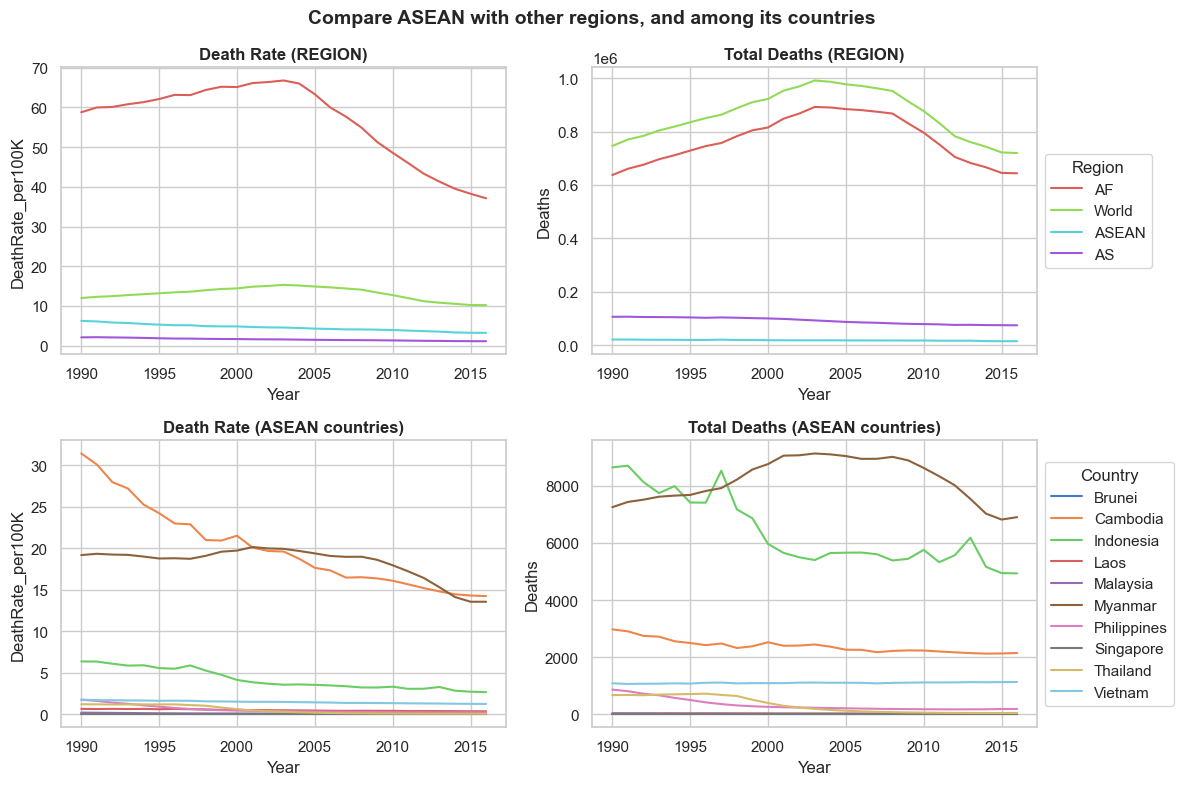

In [13]:
#Chart plotting
fig, axes = plt.subplots(nrows=2, ncols=2,figsize = (12,8))

ax1 = axes[0,0]
ax2 = axes[0,1]
ax3 = axes[1,0]
ax4 = axes[1,1]


region_order =  ['AF', 'World', 'ASEAN', 'AS']
regions_colors = sns.color_palette("hls", 4)
country_order = ASEAN
country_colors = sns.color_palette("muted", 10)

cond_1 = ~yearly_mortality_df['Entity'].isin(ASEAN)
cond_2 = yearly_mortality_df['Entity'].isin(ASEAN)

ax1_lines = sns.lineplot(data=yearly_mortality_df.loc[cond_1,:],
             x="Year",
             y="DeathRate_per100K",
             hue = 'Entity',
             hue_order=region_order,
            palette = regions_colors,
            ax = ax1);

ax2_lines = sns.lineplot(data=yearly_mortality_df.loc[cond_1,:],
             x="Year",
             y="Deaths",
             hue = 'Entity',
             hue_order=region_order,
             palette = regions_colors,
             ax = ax2);

ax3_lines = sns.lineplot(data=yearly_mortality_df.loc[cond_2,:],
             x="Year",
             y="DeathRate_per100K",
             hue = 'Entity',
             hue_order=country_order,
             palette = country_colors,
             ax = ax3);

ax4_lines = sns.lineplot(data=yearly_mortality_df.loc[cond_2,:],
             x="Year",
             y="Deaths",
             hue = 'Entity',
             hue_order=country_order,
             palette = country_colors,
             ax = ax4);

ax1_lines.get_legend().remove() 
ax2_lines.legend().set_title('Region') 
ax3_lines.get_legend().remove()  
ax4_lines.legend().set_title('Country') 
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Region')
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Country');

ax1.set_title('Death Rate (REGION)',fontsize=12 ,weight='bold')
ax2.set_title('Total Deaths (REGION)',fontsize=12 ,weight='bold')
ax3.set_title('Death Rate (ASEAN countries)',fontsize=12 ,weight='bold')
ax4.set_title('Total Deaths (ASEAN countries)',fontsize=12 ,weight='bold')

fig.suptitle("Compare ASEAN with other regions, and among its countries",  fontsize = 14, weight = 'bold')
plt.tight_layout();

---
### Fig.1 Compare ASEAN with other regions, and among its countries

ASEAN countries malaria death rates and total death are being compared to the other regions, as well as within the ASEAN countries.

|**OBSERVATION**|**DESCRIPTION**|
|---|---|
|General observations (Regional):|<li>`AFRICA` (AF) had highest malaria death rate across the years, notably higher that of the `World`. <li> `World` total malaria death across the years is evidently influenced by the total deaths in `Africa`.|
|ASEAN vs rest of the world|<li>`ASEAN` malaria death rate is notably lower than that the `World`<li>Interestingly `ASEAN` malaria death rate is **higher** than that of `Asia`(AS), the continent group that ASEAN is part of.|
|Among ASEAN countries|<li>Top 3 countries with highest malaria death rate and total malaria death across the years are `Cambodia`, `Indonesia` and `Myanmar`.<li> `Myanmar` generally had highest death rate and total death among the ASEAN countries<li> Meanwhile, between `Indonesia` and `Cambodia`, `Myanmar` had higher death rate than that of `Indonesia`, but much lower total malaria deaths than `Indonesia`. <li>Let's examine in greater detail in the following chart comparing these 3 countries.|
---

## TOP 3 ASEAN COUNTRIES: Malaria Incidence Rate, Death Rate, Total Death

In [14]:
_df = yearly_mortality_df.merge(focused_inc_rate_df,on = ['Entity','Year'])
_cond = _df['Entity'].isin(['Cambodia','Indonesia','Myanmar'])
col = ['Entity','Year','IncRate_per100K','DeathRate_per100K','Deaths']
inc_vs_deathrate = _df.loc[_cond,col]
inc_vs_deathrate

,Entity,Year,IncRate_per100K,DeathRate_per100K,Deaths
0,Cambodia,2000,207.0,21.492978,2520.521608
1,Cambodia,2005,48.7,17.629812,2259.434136
2,Cambodia,2010,20.5,16.072095,2230.076384
3,Cambodia,2015,13.0,14.293008,2127.622258
4,Indonesia,2000,99.0,4.130767,5963.278560
5,Indonesia,2005,119.1,3.532212,5657.793724
6,Indonesia,2010,129.2,3.311473,5756.380299
7,Indonesia,2015,26.1,2.710713,4943.546440
16,Myanmar,2000,78.3,19.698661,8760.651306
17,Myanmar,2005,78.1,19.362944,9041.375324


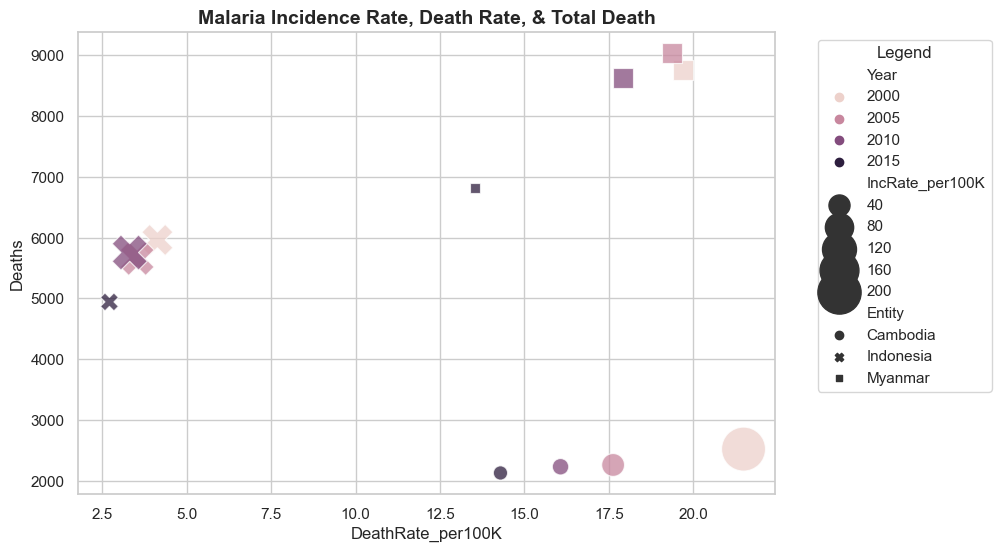

In [15]:
plt.figure(figsize = (9,6))
sns.scatterplot(data=inc_vs_deathrate,
                size='IncRate_per100K',
                x='DeathRate_per100K',
                y='Deaths',
                sizes=(100,1000),
                hue='Year',
                style='Entity',
                alpha=0.75,
                legend=True)  # Turn off the legend for individual plots

# Manually add the legend outside the plots
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Malaria Incidence Rate, Death Rate, & Total Death', fontsize = 14, weight = 'bold')
# plt.ylabel('Number of Deaths')
# plt.xlabel('Death Rate per 100K')
plt.show();

---
### Fig.2 Compare ASEAN with other regions, and among its countries

Top 3 ASEAN countries are being compared on Incidence Rate, Death Rate, & Total Death:
- The shape represents each country.
- The marker colour represents the year (darker tone, more recent years)
- The marker size represents the malaria incidence rate that year.
- The axis shows the malaria death rate against total deaths.

|**OBSERVATION**|**DESCRIPTION**|
|---|---|
|General Observation|<li> Consistent with earlier chart (Fig. 1) `Myanmar` (square) had higher malaria death rates and total deaths compared to the other two countries.<li>Meanwhile, between `Indonesia` and `Cambodia`, `Myanmar` had higher death rate than that of `Indonesia`, but much lower total malaria deaths than `Indonesia`.
|Incidence Rate|<li>Notably, all 3 countries observed decreased incidence rate across the years, as observed we observe the darker their marker, generally smaller its size.<li>`Cambodia` had highest incidence rate among the countries earlier on in 2000, but it had the greatest reduction in incidence rate over the years.<li>`Indonesia` observed some increase in incidence rate in 2005 and 2010, but had also observed drastic drop in 2015.<li>`Myanmar` observed consistent incidence rate initially, but had a reduced incidence rate in 2015.|
|Death Rate|While `Indonesia` generally had lower death rate than the other two countries, it had smallest reduction in death rate over the years|
|Total Deaths|`Myanmar` observed greatest drop in total malaria deaths, while `Cambodia` observed the least.|
    
**REMARKS: INCIDENCE VS DEATH**
- Monitoring the malaria incidence and death allow us to recognise the gaps in the countries malaria management.
- While the incidence rate reflects effectiveness of ongoing malaria prevention efforts, the death rate allow assessment on the countries effectiveness in treating malaria infected patients.
- The chart showed the countries efforts in preventing malaria had been effective as seen in the drop in incidence rate.
- However, despite some reduction in death rate and total deaths, the countries showed they have much more to work on to keep malaria death low. 
---

## TOP 3 ASEAN COUNTRIES: Age Group Mortality 

In [16]:
_df = focused_age_grp_death_df.copy()
cond_ = _df['Entity'].isin(['Cambodia','Indonesia','Myanmar','ASEAN','AS','AF','World'])
_df = _df.loc[cond_,:]
_df['Total_Deaths']= _df.groupby(['Entity', 'Year'])['Deaths'].transform('sum')
_df['Age_grp_Perc_death'] = (_df['Deaths'] / _df['Total_Deaths']) * 100
_df.drop(columns = 'Total_Deaths', inplace = True)
_df.reset_index(drop = True, inplace = True)
subentity_age_grp_death_df = _df
subentity_age_grp_death_df

,Entity,Year,Age_group,Deaths,Age_grp_Perc_death
0,Cambodia,1990,Under 5,1403.479785,47.224660
1,Cambodia,1991,Under 5,1300.856742,44.808024
2,Cambodia,1992,Under 5,1154.085978,42.063715
3,Cambodia,1993,Under 5,1090.284793,40.132356
4,Cambodia,1994,Under 5,942.009172,36.870908
...,...,...,...,...,...
940,AS,2016,15-49,20548.588716,27.506009
941,AS,2016,5-14,14186.293062,18.989543
942,AS,2016,50-69,10810.426918,14.470663
943,AS,2016,70 or older,5804.189042,7.769394


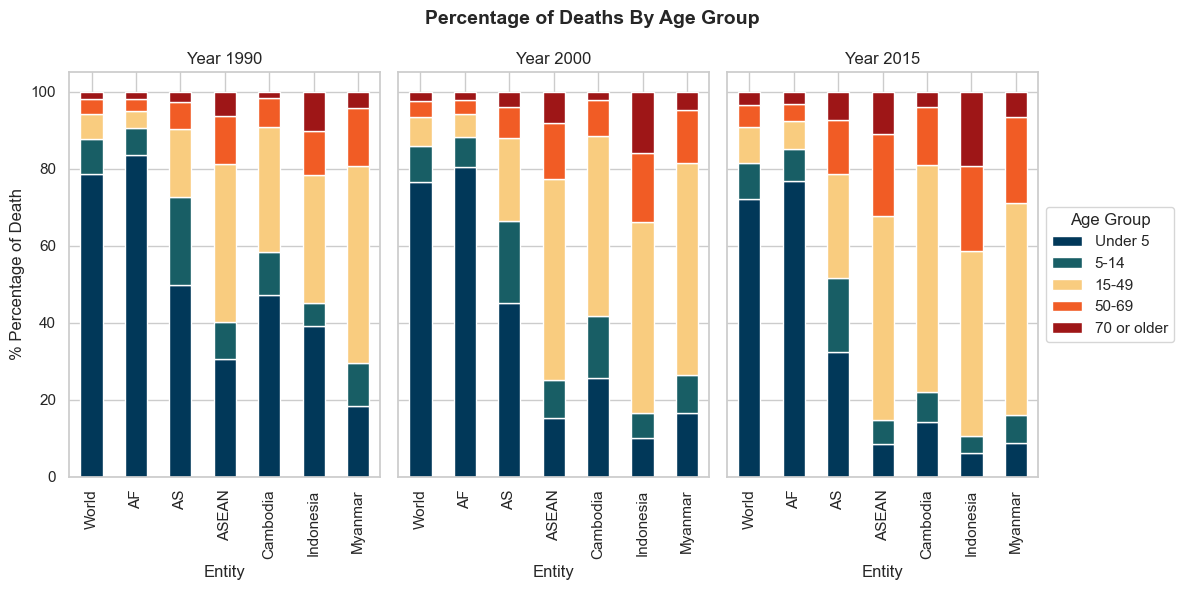

In [17]:
# Define the desired order for the x-axis
x_order = ['World', 'AF', 'AS', 'ASEAN', 'Cambodia', 'Indonesia', 'Myanmar']

# Define the order of the age groups for stacking
odr = ['Under 5', '5-14', '15-49', '50-69', '70 or older']

# Define colors for each age group
colors = ["#013859", "#185E65", "#F9CC7F", "#F15C25", "#9E1617"]

# Define years to plot
years = [1990, 2000, 2015]

# Chart plotting
fig, axes = plt.subplots(nrows=1,
                         ncols=3,
                         figsize=(12, 6),
                        sharey = True)

ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

for i in range(3):
    # Step 1: create pivot table per year
    yr = years[i]
    _df = subentity_age_grp_death_df.copy()
    cond = _df['Year'] == yr
    _df = _df.loc[cond, ['Entity', 'Age_group', 'Age_grp_Perc_death']]

    # Create the pivot table and reindex it to have consistent ordering of age groups
    pivot_table_name = 'pivot_table_' + str(yr)
    pivot_table = _df.pivot(index='Entity', columns='Age_group', values='Age_grp_Perc_death')
    pivot_table = pivot_table.reindex(columns=odr)
    
    # Reindex the pivot table to have the desired order of entities on the x-axis
    pivot_table = pivot_table.reindex(x_order)

    # Save the pivot table in the global namespace with a unique name for each year
    globals()[pivot_table_name] = pivot_table

    # Step 2: Plot the stacked bar chart
    ax = globals()[f'ax{i + 1}']
    globals()[f'ax{i+1}_lines'] = pivot_table.plot(kind='bar',
                                                   stacked=True,
                                                   color=colors,
                                                   ax=ax)
    
    # Set the x-axis label and title for each subplot
    ax.set_xlabel('Entity')
    ax.set_title(f'Year {yr}')

#Plot legend
ax1_lines.get_legend().remove() 
ax2_lines.get_legend().remove() 
ax3_lines.legend().set_title('Legend') 
ax3_lines.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Age Group')

# Set y-axis label for the left-most subplot (ax1)
ax1.set_ylabel('% Percentage of Death')

#Plot title
fig.suptitle("Percentage of Deaths By Age Group", fontsize = 14, weight = 'bold')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show();


---
### Fig.3 Compare Age Group Percentage Deaths

Top 3 ASEAN countries Age Group Deaths compared to regions and world (Year 1990, 2000, 2015):
- According to [Our Wordl in Data](https://ourworldindata.org/malaria#), at a global level, the most vulnerable age group to malaria deaths are children under five years old.

|**OBSERVATION**|**DESCRIPTION**|
|---|---|
|Age Group making up largest % of yearly malaria deaths|<li> Consistent with `Our World in Data`, Children under 5 years old had been the most vulnerable group to malaria deaths in `Asia`(AS), `Africa`(AF) and the `World`.<li> Interestingly, especially in the more recent years, children and youths (under 15 years old) were not the age group making up largest proportion of total malaria deaths in ASEAN.<li>Generally, `ASEAN`,`Cambodia`,`Indonesia` and `Myanmar` observed age group 15-49 making up largest proportion of total malaria deaths in 1990,2000 and 2015 (*except in Cambodia 1990, when children under 5 years old have higher deaths*).<li>Proportion of deaths contributed by children under 5 in `Asia`, `ASEAN`,`Cambodia`,`Indonesia` and `Myanmar` had notably declined over the years, but not the case in the `World` and `Africa` whose % Deaths by this age group remain above 70%.|
---

    
